In [1]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np
import pickle
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 600
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


# Test solubility

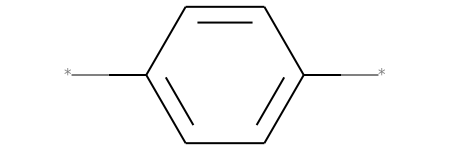

In [8]:
mol = Chem.MolFromSmiles('[*]c1ccc([*])cc1')
mol

In [17]:
type(Chem.MolFromSmarts('[R0]'))

rdkit.Chem.rdchem.Mol

In [18]:
mol.GetSubstructMatches(Chem.MolFromSmarts('[R0]'))

((0,), (5,))

In [20]:
importlib.reload(ru)
ru.is_soluble(mol) #should be False

False

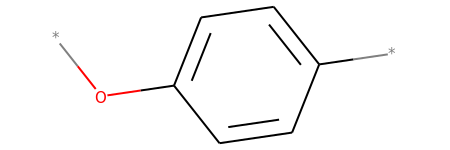

In [3]:
mol2 = Chem.MolFromSmiles('[*]Oc1ccc([*])cc1')
mol2

In [21]:
ru.is_soluble(mol2) #should be True

True

In [22]:
'dep' in 'depol'

True

# Test synthetic score

In [ ]:
with open('/data/rgur/retrosynthesis/molecule_lookup/mol_set.pkl','rb') as f:
    mol_set = pickle.load(f)

In [24]:
Chem.MolToSmiles(mol)

'*c1ccc(*)cc1'

In [52]:
importlib.reload(retro)
paths = retro.retrosynthesize([Chem.MolToSmiles(mol)])
paths

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz
#######
*c1ccc(*)cc1
<function ring_close_retro at 0x7f69e0236730>
inner_RxnPaths len: 0
<function func_chain_retro at 0x7f69e0236378>
inner_RxnPaths len: 0
<function hydrogenate_chain at 0x7f69e156a268>
inner_RxnPaths len: 0
<function elim_retro at 0x7f69e0236bf8>
inner_RxnPaths len: 6
sm_RxnPaths len: 7


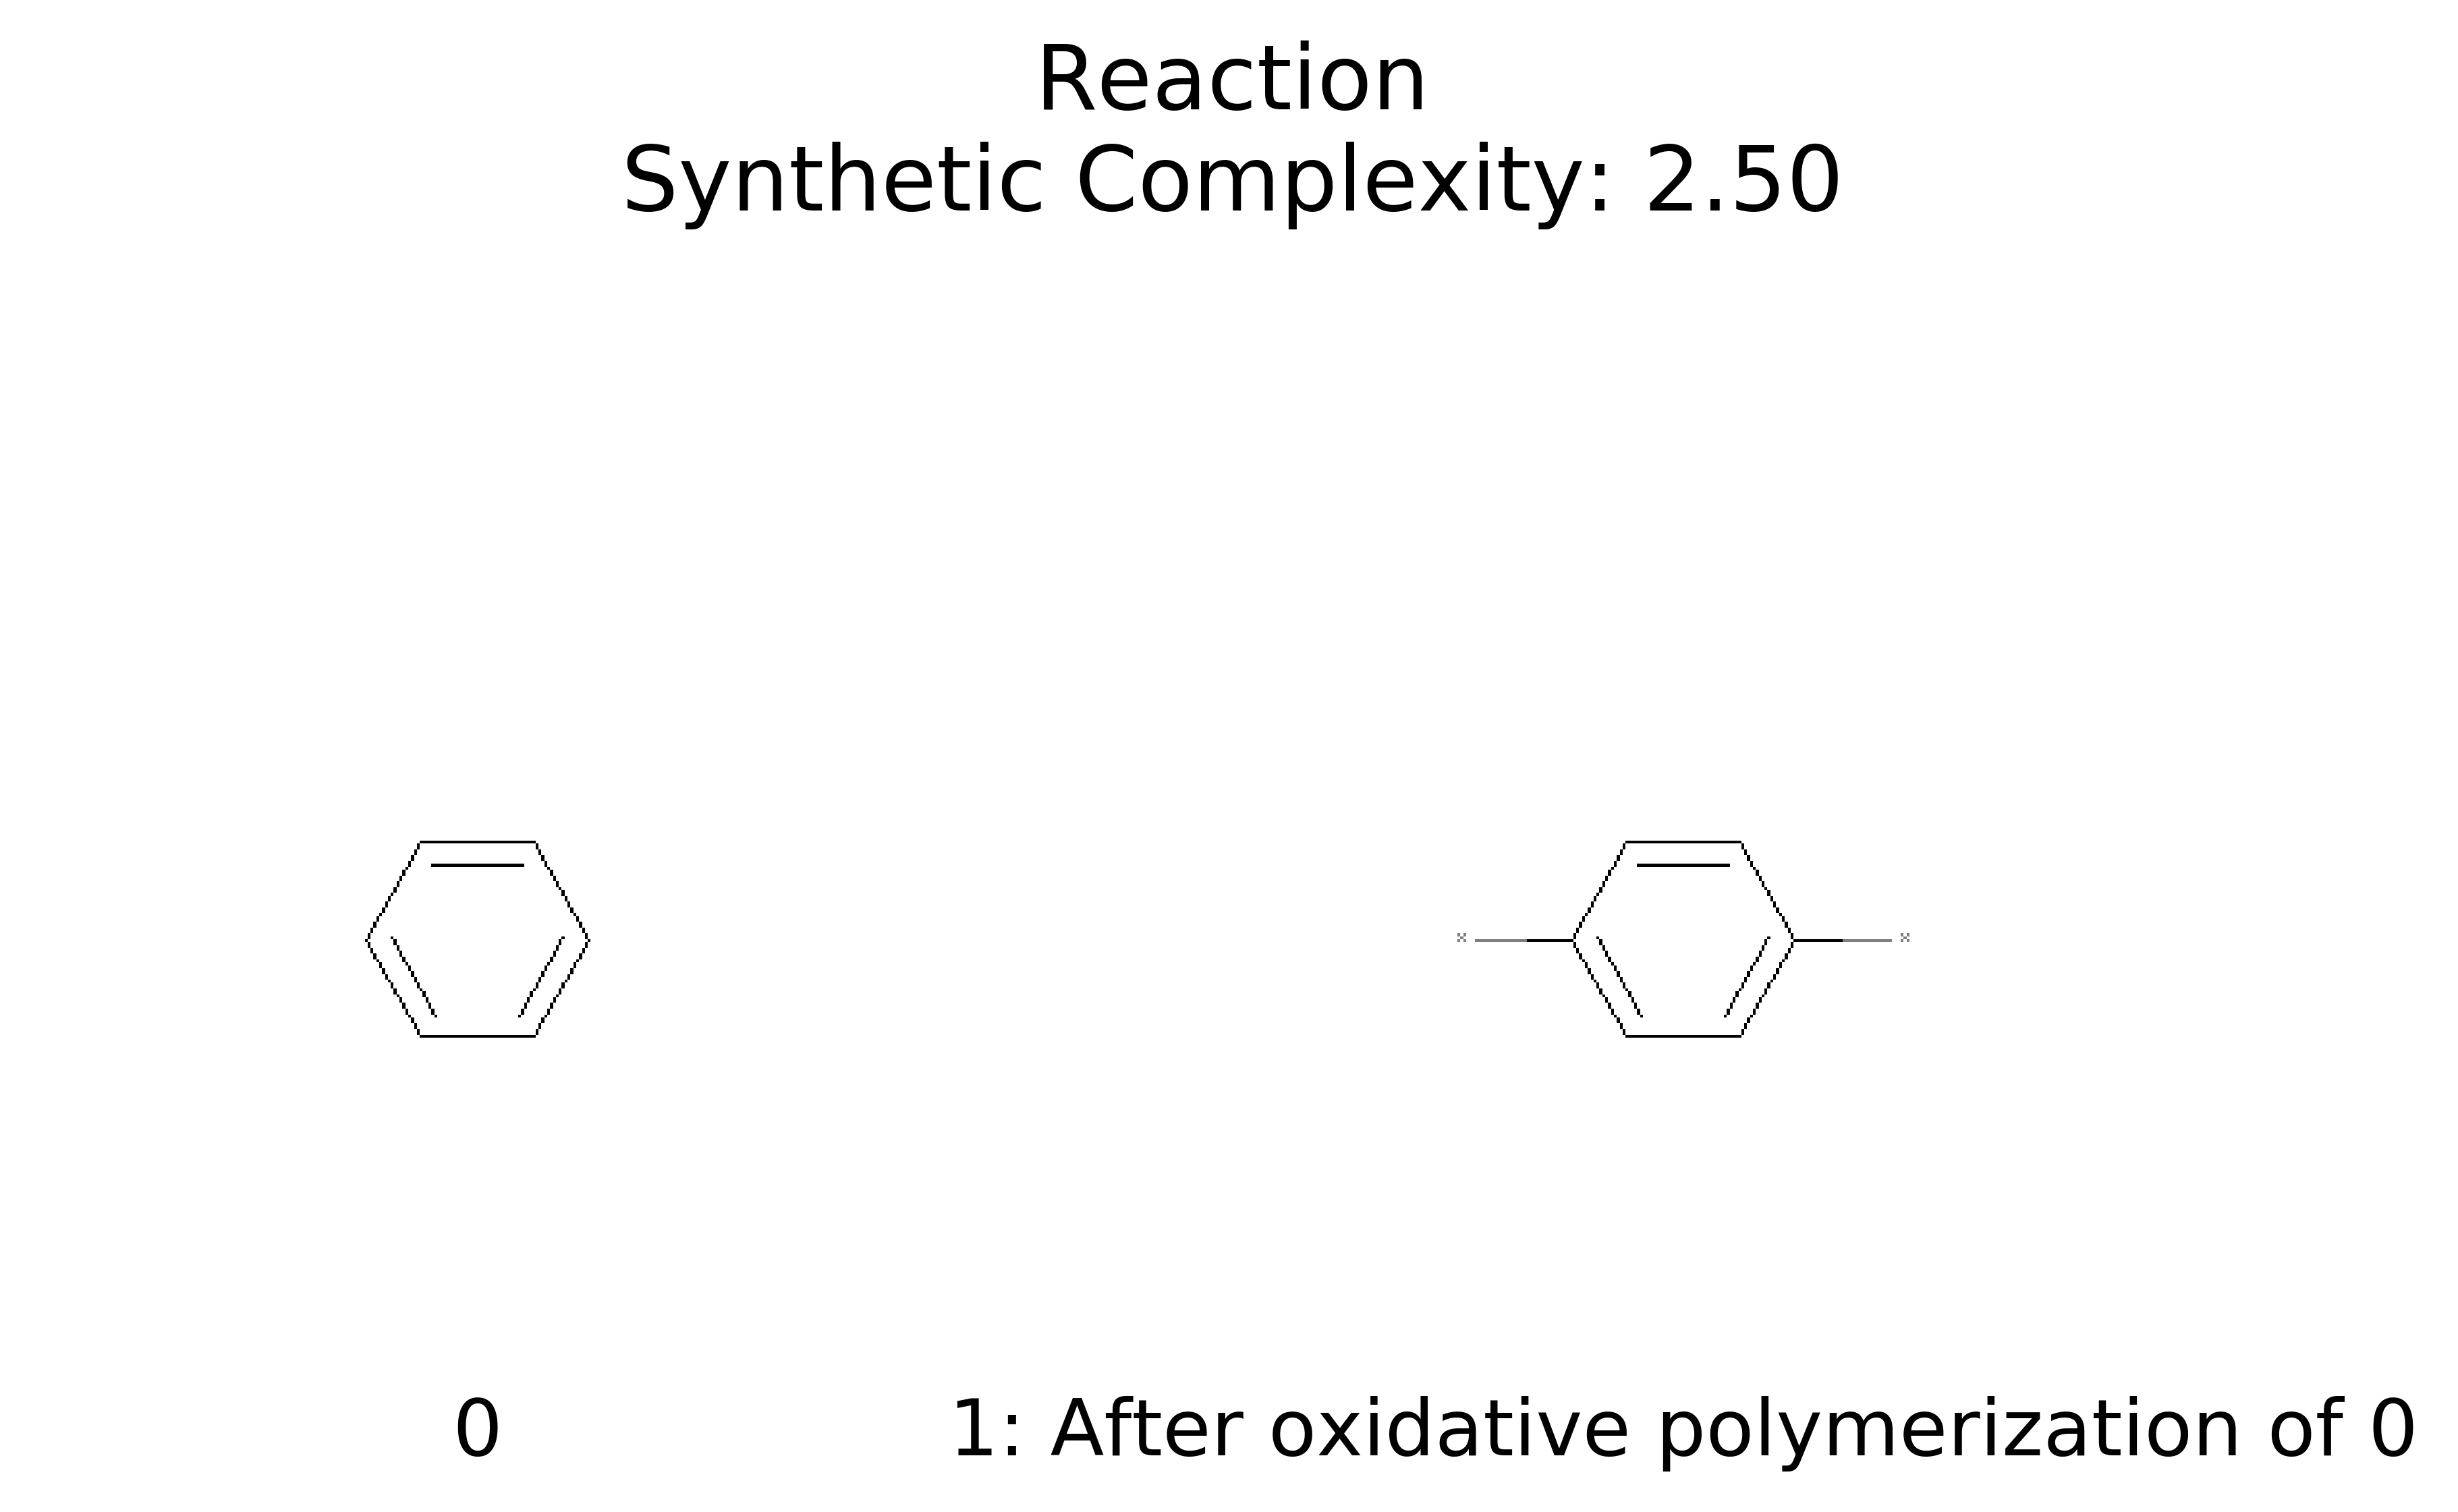

In [53]:
paths[0].SearchReactants(mol_set)
paths[0].SyntheticScore()
paths[0].DrawSteps()

Restored variables from /data/rgur/retrosynthesis/scscore/models/full_reaxys_model_1024uint8/model.ckpt-10654.as_numpy.json.gz


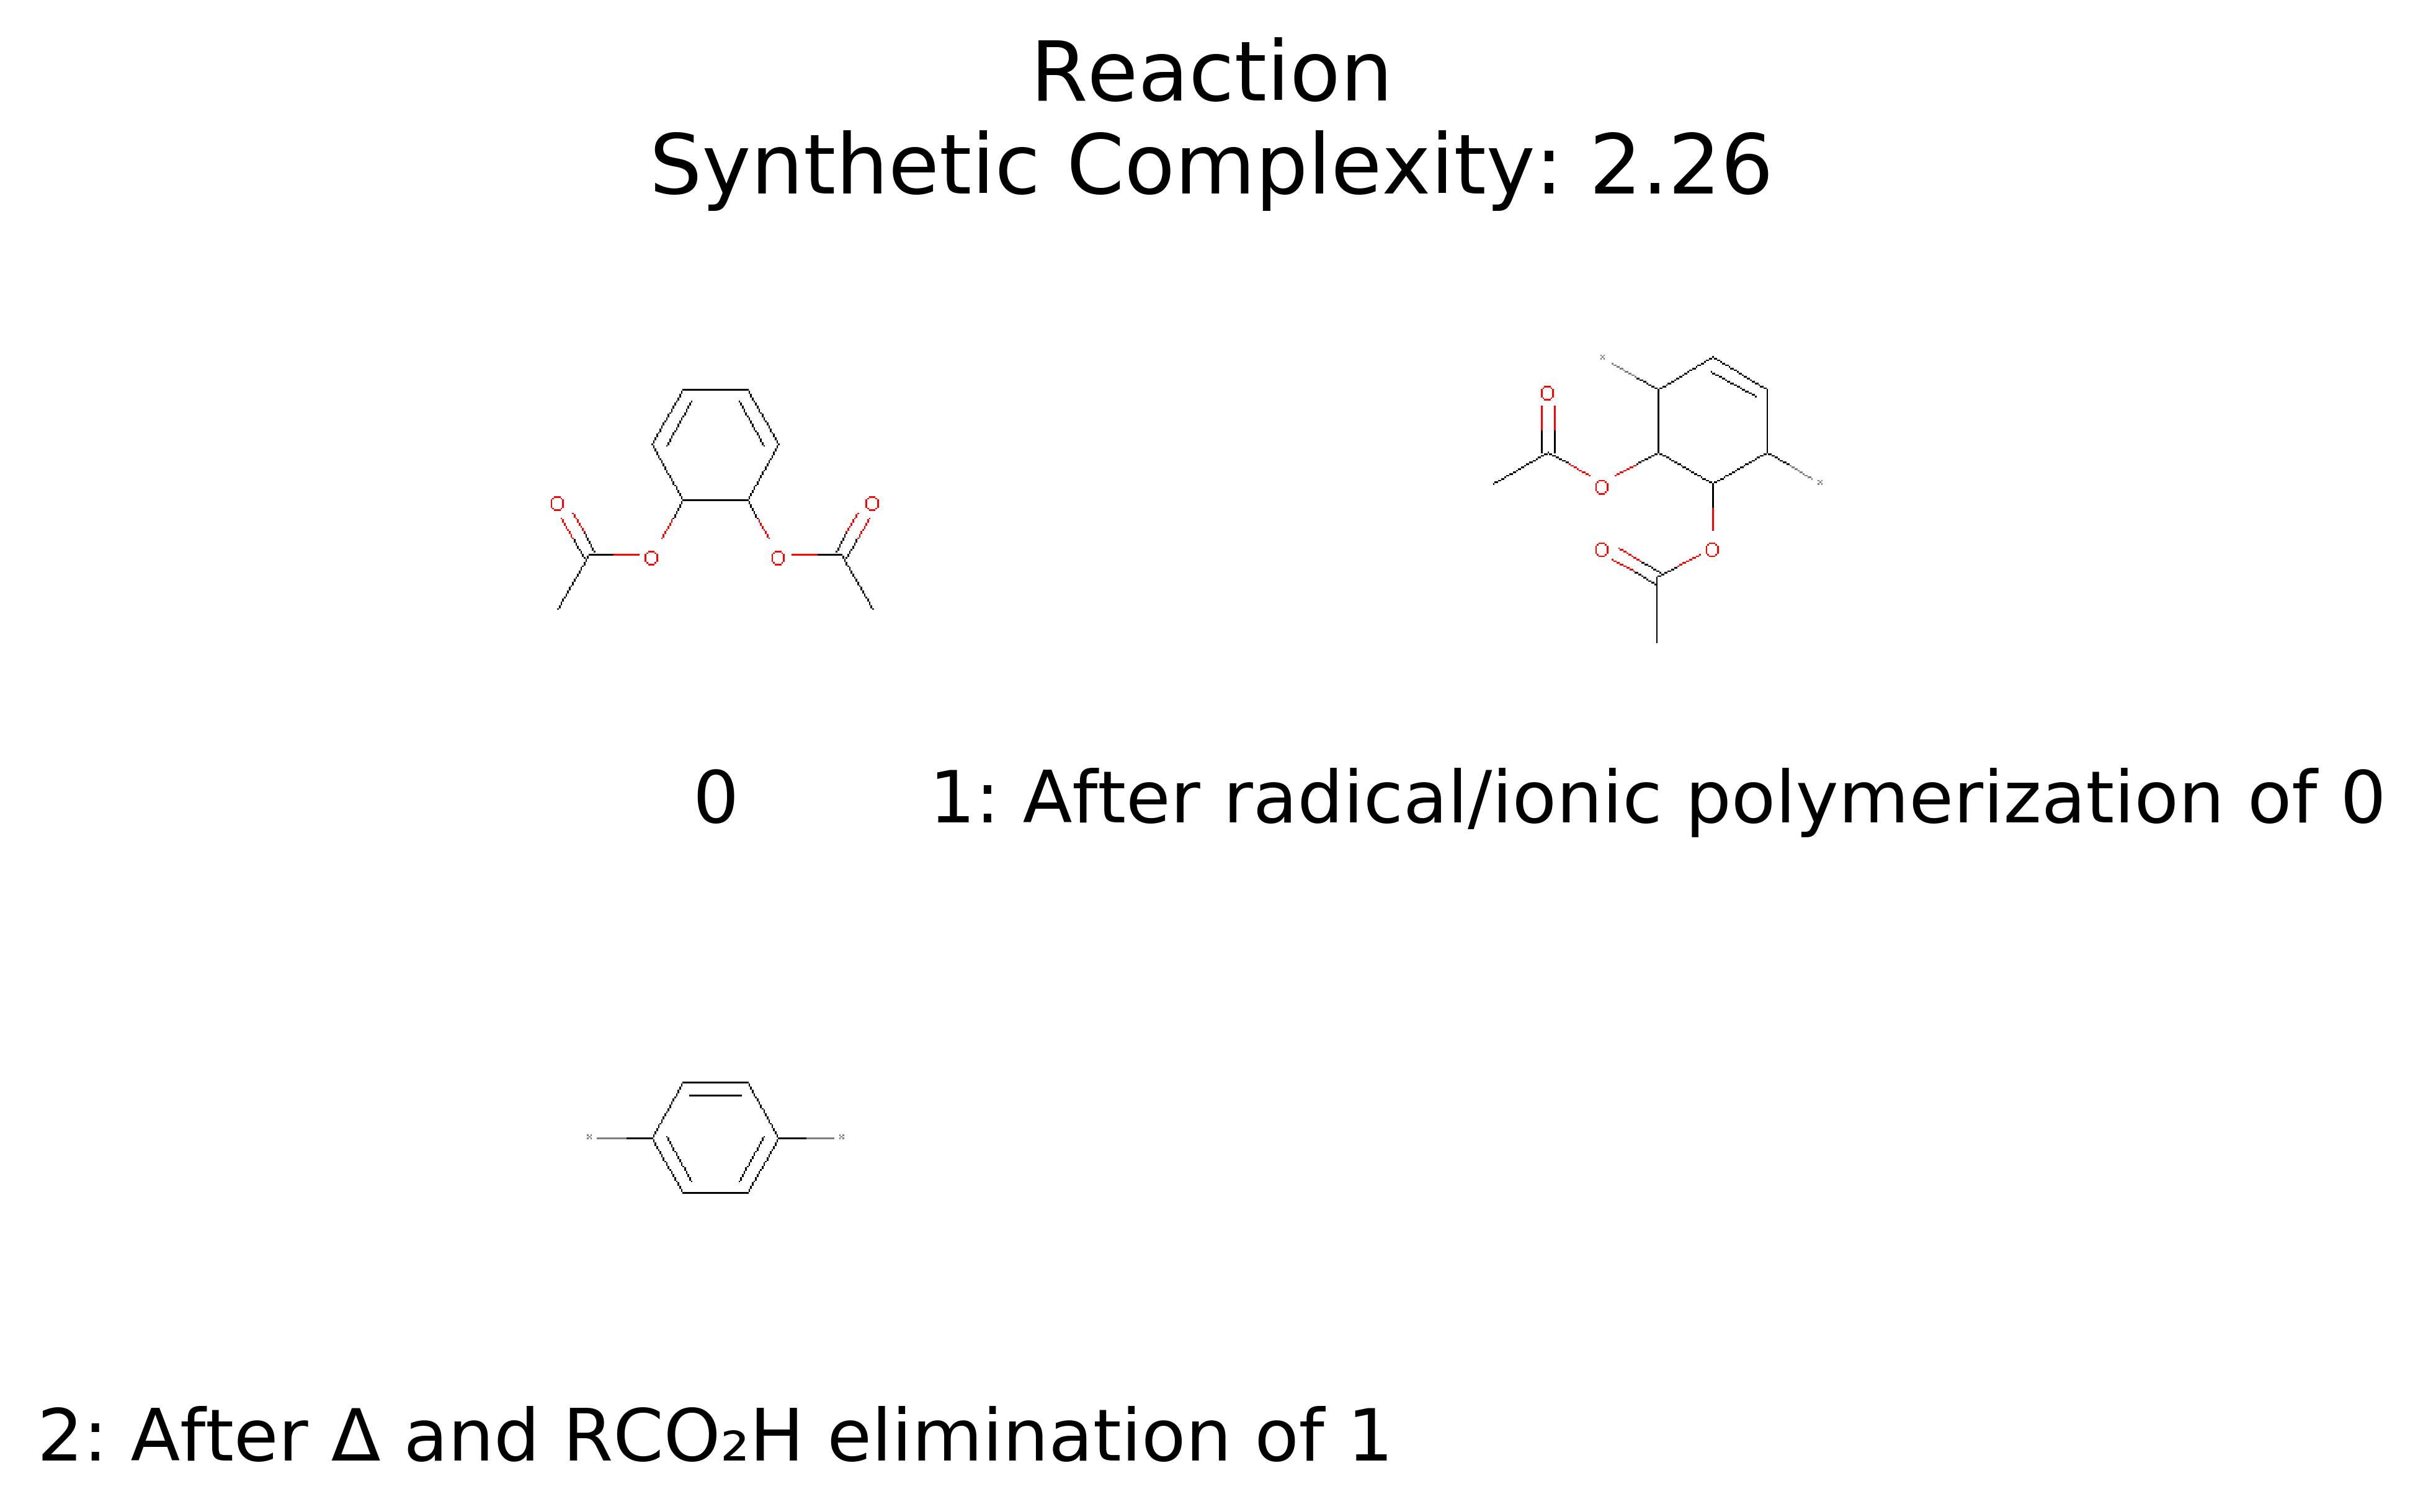

In [55]:
importlib.reload(retro)
paths[1].SearchReactants(mol_set)
paths[1].SyntheticScore()
paths[1].DrawSteps()

In [50]:
dp_func_ls = list(reversed([x.rxn_fn for x in paths[1].reaction_step_ls]))
dp_func_ls

['frp_depolymerize', 'elim_retro']

In [51]:
[retro.fwd_rxn_labels[dp_func] for dp_func in dp_func_ls]

KeyError: 'elim_retro'